In [52]:
!pip install numpy==1.23.5

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/14.6 MB ? eta -:--:--
     ---------------------------------------- 0.1/14.6 MB 1.7 MB/s eta 0:00:09
     ---------------------------------------- 0.1/14.6 MB 1.2 MB/s eta 0:00:12
      --------------------------------------- 0.2/14.6 MB 1.9 MB/s eta 0:00:08
     - -------------------------------------- 0.4/14.6 MB 1.9 MB/s eta 0:00:08
     - -------------------------------------- 0.4/14.6 MB 2.1 MB/s eta 0:00:07
     - -------------------------------------- 0.5/14.6 MB 1.8 MB/s eta 0:00:08
     - -------------------------------------- 0.6/14.6 MB 1.8 MB/s eta 0:00:08
     - -------------------------------------- 0.7/14.6 MB 1.9 MB/s eta 0:00:08
     -- ------------------------------------- 0.8/14.6 MB 2.0 MB/s eta 0:00:08
     -- ------------------------------------- 0.9/14.6 MB 2.1 MB/s eta 0:00:07
     -- ------------------------------------- 1.0/14.6 MB 2.

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
transformers 2.1.1 requires sentencepiece, which is not installed.


In [1]:
!pip install geopandas

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/27/27/2687abaa2ac02b5814e2929a5033da1e5d132c19a904dc56f77f63fd6eb9/geopandas-0.14.0-py3-none-any.whl.metadata
  Obtaining dependency information for fiona>=1.8.21 from https://files.pythonhosted.org/packages/b0/7f/2de46a2630f609b7520d74ffc7692d4969b1fa1dd3c82f62c7967183d365/Fiona-1.9.4.post1-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/50.6 kB ? eta -:--:--
     ---------------------------------------- 50.6/50.6 kB 1.3 MB/s eta 0:00:00
  Obtaining dependency information for pyproj>=3.3.0 from https://files.pythonhosted.org/packages/79/95/eb68113c5b5737c342bde1bab92705dabe69c16299c5a122616e50f1fbd6/pyproj-3.6.1-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
     ---- ----------------------------------- 0.1/1.4 MB 4.3 MB/

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
!pip install ipdb

Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd

from collections import defaultdict
from scipy import stats

%matplotlib inline

In [3]:
import geopandas as gpd
import ipdb

In [8]:
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['figure.titlesize'] = 16

In [7]:
df_lon = pd.read_csv('file:///D:/MSIB/Jupyter/Assignment%20Python/london_crime_by_lsoa.csv')
print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [161]:
df_lon.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [162]:
df_lon.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [163]:
print(df_lon.shape)

(13490604, 7)


### Melihat data Crime per tahun menggunakan Bar Chart

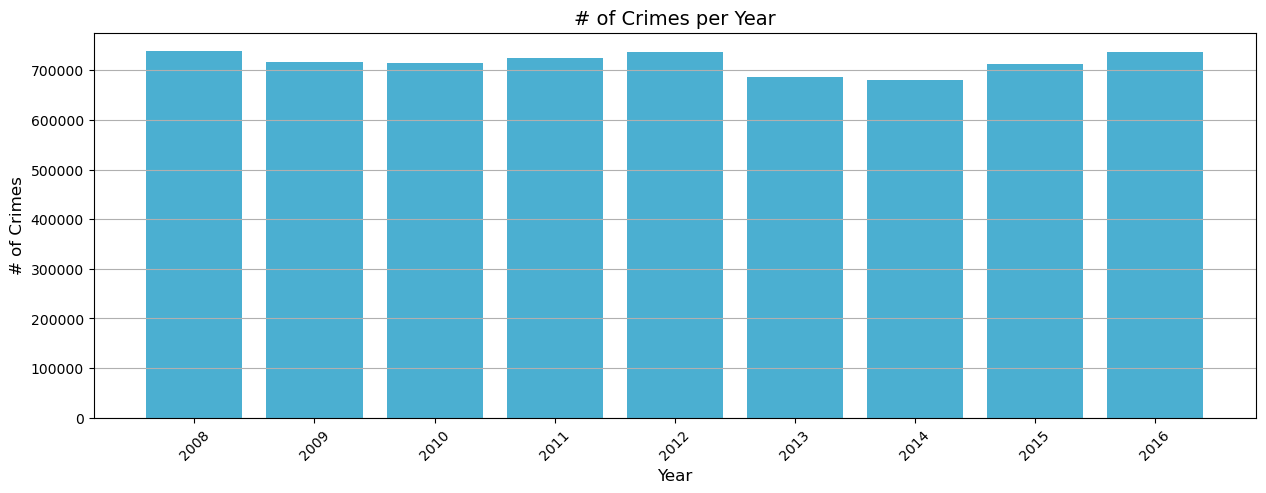

In [160]:
# Data yang telah Anda siapkan sebelumnya
crimes_per_year = {}

for year in np.sort(df_lon['year'].unique()):
    crimes_y = df_lon.loc[df_lon['year'] == year]
    crimes_per_year[year] = sum(crimes_y['value'])

# Mengambil tahun dan jumlah kejahatan sebagai list terpisah
years = list(crimes_per_year.keys())
crime_counts = list(crimes_per_year.values())

# Membuat bar chart
plt.figure(figsize=(15, 5))
plt.bar(years, crime_counts, color='#4bafd1')
plt.xlabel('Year')
plt.ylabel('# of Crimes')
plt.title('# of Crimes per Year')
plt.grid(axis='y')  # Menambahkan grid pada sumbu Y

# Menampilkan label tahun pada sumbu X agar lebih rapi
plt.xticks(years, rotation=45)

plt.show()


Angka pertama mewakili aliran aktivitas kriminal secara tahunan. Seperti yang kita lihat, tahun yang paling padat kriminal adalah, masing-masing, 2008, 2012 dan 2016. Di sisi lain, yang paling damai adalah, masing-masing, 2014 dan 2013. Mengamati perilaku yang tetap konsisten dengan angka pertama. Angka ketiga menunjukkan aliran aktivitas kriminal pada dasar bulanan untuk tahun-tahun yang paling padat. Jika kita membayangkan aktivitas kriminal yang diwakili dalam grafik ini sebagai aliran, perlu dicatat bahwa jumlah laporan kriminal cenderung meningkat sekali setiap empat tahun.

In [54]:
np.object = object    

In [55]:
cropped_ds = df_lon.loc[df_lon['value'] != 0]
cropped_ds.describe(include=np.object)

,lsoa_code,borough,major_category,minor_category
count,3419099,3419099,3419099,3419099
unique,4835,33,9,32
top,E01004734,Lambeth,Theft and Handling,Other Theft
freq,2387,152784,1136994,297281


Terlepas dari apa yang telah dikatakan dalam analisis superficial, muncul bahwa tahun 2016, meskipun kurang padatnya aktivitas kriminal di tiga teratas yang diwakili oleh tahun, dalam urutan turun, 2008, 2012 dan 2016, adalah yang memiliki mayoritas catatan dalam dataset yang dipotong. Ini berarti bahwa, tetap konsisten dengan apa yang muncul dalam analisis variabel numerik, memiliki rasio kejahatan per bulan yang lebih rendah di antara tiga.

### MINOR CATEGORIES PER MAJOR CATEGORY

In [57]:
for major_category in cropped_ds['major_category'].unique():
    minor_categories = \
        list(cropped_ds.loc[cropped_ds['major_category'] == major_category] \
        ['minor_category'].unique())
    print('\n{}: {}'.format(major_category, '\n\t'.join(minor_categories)))


Theft and Handling: Theft/Taking of Pedal Cycle
	Other Theft Person
	Other Theft
	Theft/Taking Of Motor Vehicle
	Theft From Shops
	Motor Vehicle Interference & Tampering
	Theft From Motor Vehicle
	Handling Stolen Goods

Violence Against the Person: Harassment
	Wounding/GBH
	Assault with Injury
	Common Assault
	Offensive Weapon
	Other violence
	Murder

Criminal Damage: Criminal Damage To Motor Vehicle
	Criminal Damage To Dwelling
	Criminal Damage To Other Building
	Other Criminal Damage

Robbery: Personal Property
	Business Property

Burglary: Burglary in a Dwelling
	Burglary in Other Buildings

Other Notifiable Offences: Going Equipped
	Other Notifiable

Drugs: Possession Of Drugs
	Drug Trafficking
	Other Drugs

Sexual Offences: Other Sexual
	Rape

Fraud or Forgery: Counted per Victim
	Other Fraud & Forgery


C:\Users\MyBook14H\AppData\Local\Temp\ipykernel_7100\972445348.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .groupby('minor_category').sum().to_dict()['value']
C:\Users\MyBook14H\AppData\Local\Temp\ipykernel_7100\972445348.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .groupby('minor_category').sum().to_dict()['value']
C:\Users\MyBook14H\AppData\Local\Temp\ipykernel_7100\972445348.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be v

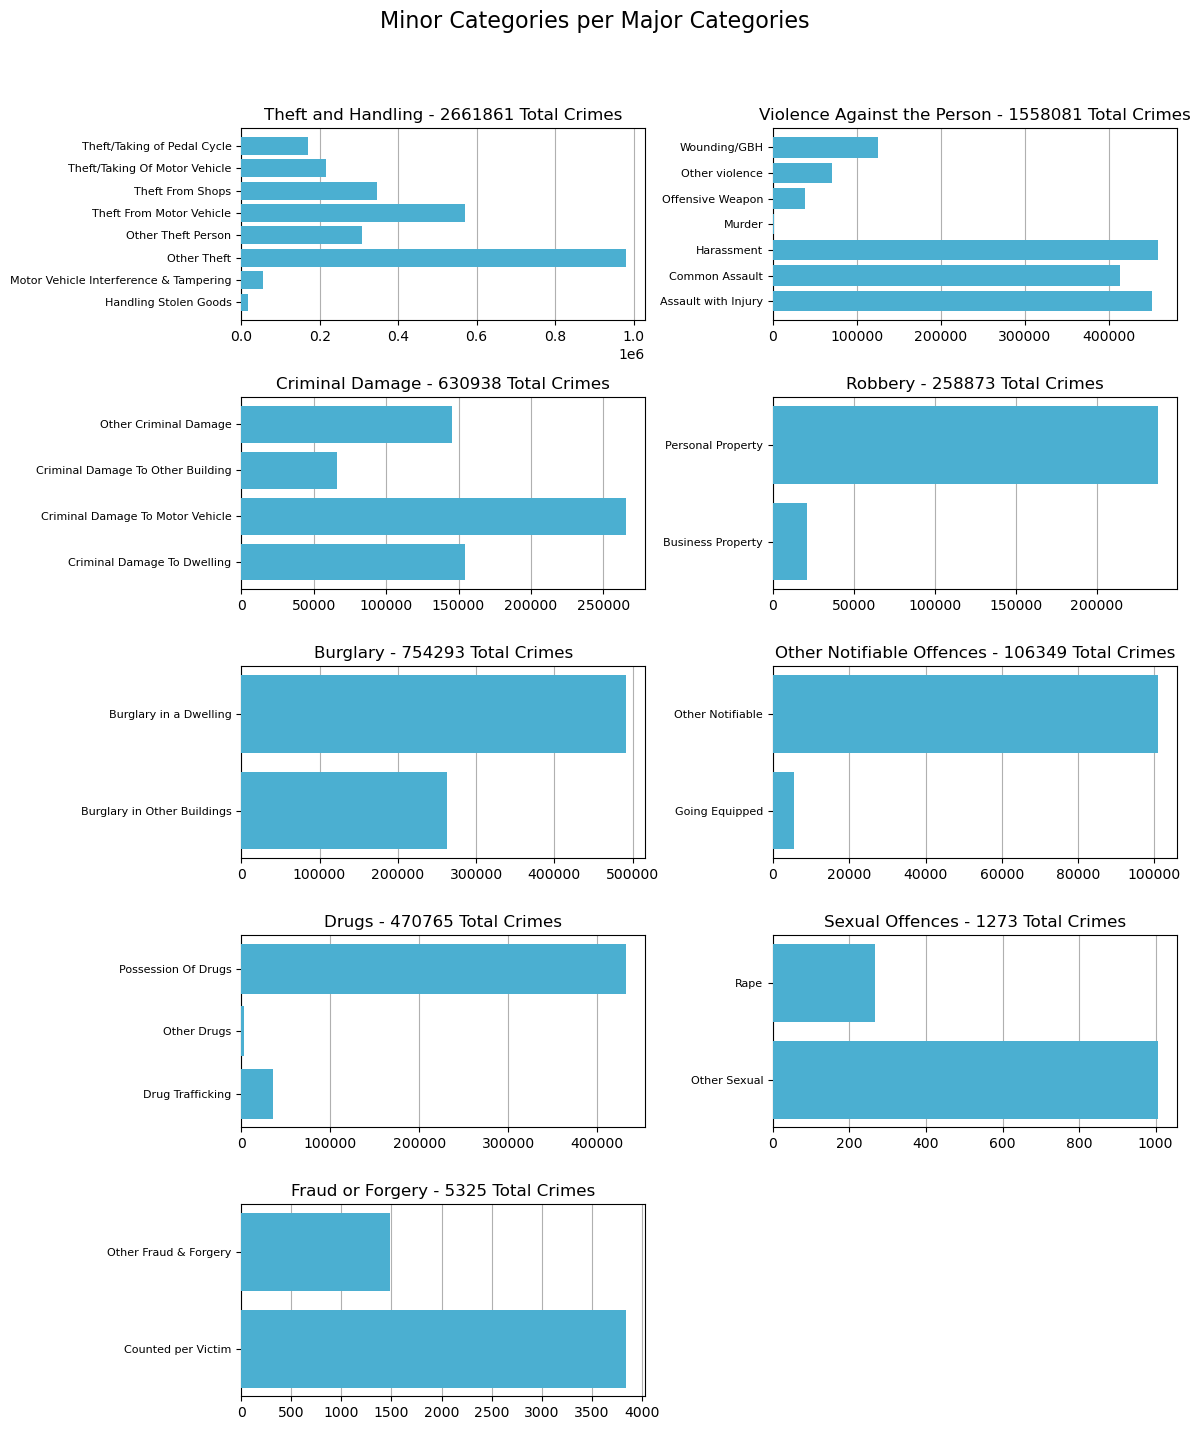

In [187]:
# Membuat gambar berukuran 12x15 inci
plt.figure(figsize=(12, 15))

# Iterasi melalui major categories yang unik dalam dataset
for i, major_category in enumerate(cropped_ds['major_category'].unique()):
    # Mengambil data minor categories yang berkaitan dengan major category saat ini
    min_cat = cropped_ds.loc[cropped_ds['major_category'] == major_category] \
        .groupby('minor_category').sum().to_dict()['value']
    
    # Membuat subplot dengan 5 baris dan 2 kolom, dan mengatur nomor subplot saat ini
    plt.subplot(5, 2, i + 1)
    
    # Membuat horizontal bar plot untuk minor categories
    plt.barh(range(len(list(min_cat.keys()))), list(min_cat.values()), 
             color='#4bafd1', align='center', zorder=3)
    
    # Menambahkan label pada sumbu y dengan nama minor categories
    plt.yticks(range(len(list(min_cat.keys()))), list(min_cat.keys()), 
               fontsize=8)
    
    # Menambahkan judul subplot dengan total jumlah kejahatan di major category saat ini
    plt.title('{} - {} Total Crimes'.format(major_category, sum(list(min_cat.values()))), 
              fontsize=12)
    
    # Menambahkan grid pada sumbu x
    plt.grid(zorder=0, axis='x')

# Menambahkan judul utama
plt.suptitle('Minor Categories per Major Categories', fontsize=16)

# Mengatur tata letak subplot agar rapi
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Menampilkan plot
plt.show()



Seperti yang dapat kita lihat, dengan Pencurian dan Handling yang paling beragam dengan delapan kategori minor. Di grafik, kita dapat melihat pemisahan jumlah total aktivitas kriminal untuk masing-masing kategori utama kejahatan di antara kategori kecilnya. Dengan mengamati grafik, adalah mungkin untuk mengekstrak kategori minor yang paling sering untuk setiap kategori utama, mendapatkan:

Theft and Handling -> Other Theft
Violence Against the Person -> Harrasment
Criminal Damage -> Criminal Damage To Motor Vehicle
Robbery -> Personal Robbery
Burglary -> Burglary in a Dwelling
Other Notifiable Offences -> Other Notifiable
Drugs -> Possession Of Drugs
Sexual Offences -> Other Sexual
Fraud or Forgery -> Counted per Victim

###  OF CRIMES PER MAJOR CATEGORY AND MINOR CATEGORY
Menggunakan Horizontal Bar Chart dan Pie Chart

In [186]:
def plot_ordered_horizontal_barplot(dataset, column, title, x_label, y_label, save=False):
    # Membuat daftar nilai unik dari kolom yang diberikan dalam dataset
    unique_values = dataset[column].unique()
    
    # Membuat kamus defaultdict untuk menyimpan data ke dalam daftar berdasarkan nilai
    values_dict = defaultdict(list)
    
    # Iterasi melalui nilai unik dan menghitung jumlah kumulatif berdasarkan kolom 'value'
    for val in unique_values:
        values_dict[sum(dataset.loc[dataset[column] == val]['value'])].append(val)
    
    # Membuat daftar indeks y (ys) dan lebar (widths) untuk plot bar horizontal
    ys = range(sum([len(l) for l in values_dict.values()]))
    widths = []
    
    # Mengisi daftar lebar dengan jumlah kumulatif dan daftar indeks kategori yang sesuai
    for key in values_dict:
        for value in values_dict[key]:
            widths.append(key)
    
    # Mengurutkan lebar-lebar secara ascending
    widths = np.sort(widths)
    
    # Menginisialisasi daftar kategori yang telah diurutkan berdasarkan lebar
    ordered_keys = []
    
    # Mengurutkan kategori berdasarkan lebar
    for width in np.sort(list(values_dict.keys())):
        for value in values_dict[width]:
            ordered_keys.append(value)
    
    # Membuat plot bar horizontal
    plt.grid(axis='x', zorder=0)  # Menambahkan grid pada sumbu x
    plt.barh(y=ys, width=widths, color='#4bafd1', align='center', zorder=3)  # Membuat bar plot horizontal
    plt.yticks(ys, ordered_keys)  # Menampilkan label kategori pada sumbu y
    plt.xlabel(x_label)  # Menambahkan label sumbu x
    plt.ylabel(y_label)  # Menambahkan label sumbu y
    plt.title(title)  # Menambahkan judul plot
    
    # Opsi untuk menyimpan gambar jika save=True
    if save:
        plt.savefig('horizontal_barplot.png', dpi=300, bbox_inches='tight')
    
    # Menampilkan plot
    plt.show()


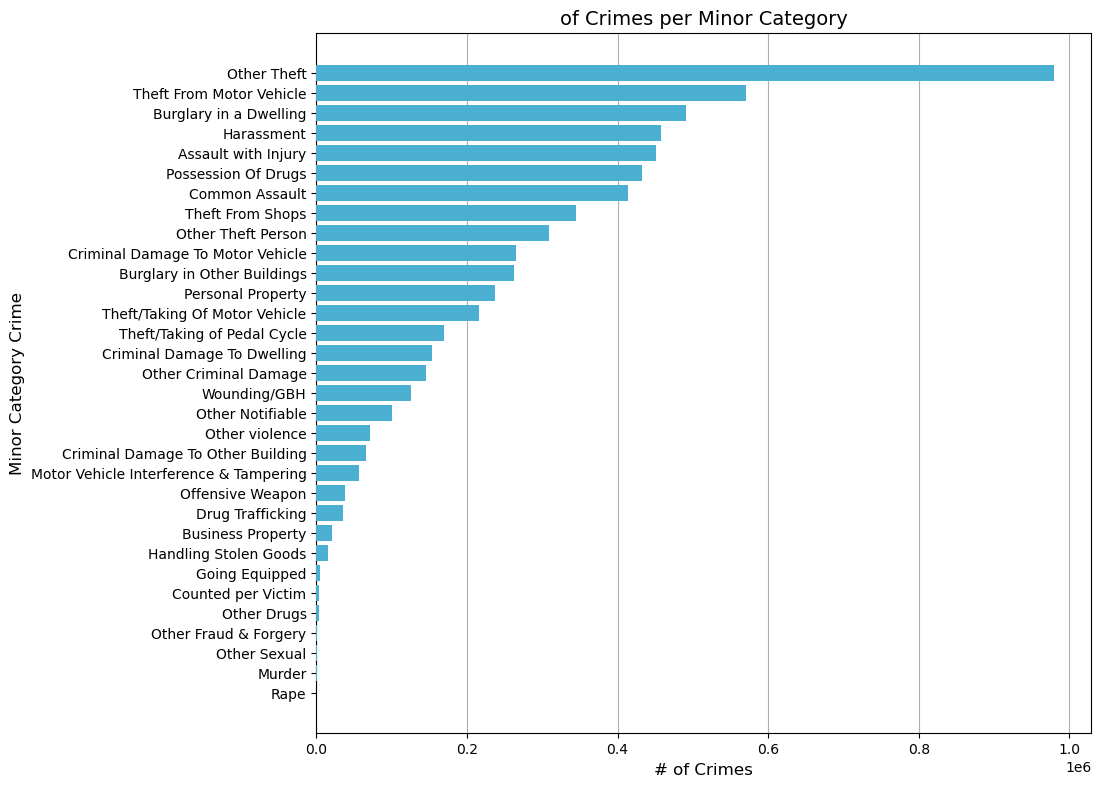

In [94]:
plt.figure(figsize=(10, 20))
plt.subplot(2, 1, 2)
plot_ordered_horizontal_barplot(cropped_ds, 'minor_category', 
                                'of Crimes per Minor Category', '# of Crimes', 
                                'Minor Category Crime')


In [158]:
def plot_pie_chart(dataset, column, title, save=False):
    # Menghitung jumlah masing-masing nilai dalam kolom
    value_counts = dataset[column].value_counts()
    values_dict = defaultdict(list)
    explode_list = [0, 0, 0, 0, 0.1, 0.1, 0.1, 0.2, 0.3]
    
    
    for val in value_counts:
        values_dict[sum(dataset.loc[dataset[column] == val]['value'])]. \
            append(val)
    ys = range(sum([len(l) for l in values_dict.values()]))
    widths = []
    
    
    for key in values_dict:
        for value in values_dict[key]:
            widths.append(key)
    
    widths = np.sort(widths)
    
    ordered_keys = []
    
    for width in np.sort(list(values_dict.keys())):
        for value in values_dict[width]:
            ordered_keys.append(value)
    # Mendapatkan nilai dan frekuensinya
    labels = value_counts.index
    sizes = value_counts.values
    

    # Membuat pie chart
    plt.figure(figsize=(20, 6))
    plt.pie(sizes, labels= None, autopct='%1.1f%%', startangle=90,  pctdistance=1.12, shadow=True, explode=explode_list)
    plt.title(title)
    plt.legend(labels=value_counts.index, loc='upper left')
    plt.axis('equal')

    if save:
        plt.savefig("pie_chart.png")

    plt.show()


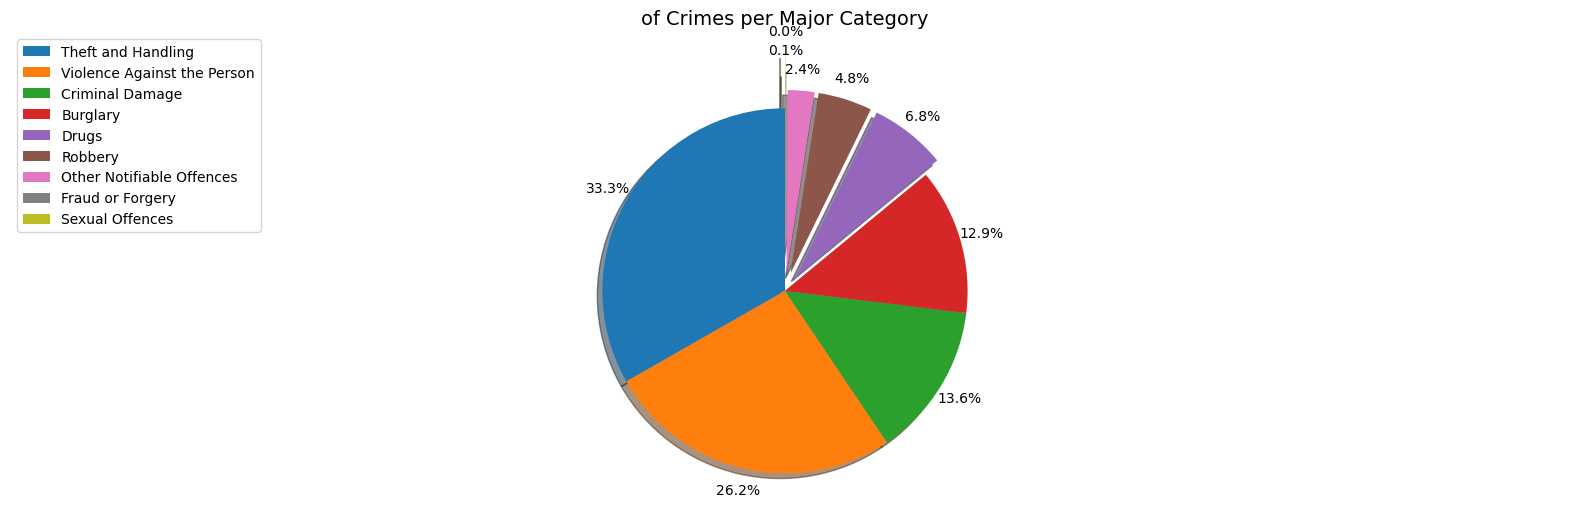

In [159]:
plot_pie_chart(cropped_ds,'major_category', 'of Crimes per Major Category')

Meskipun Lambeth adalah borough yang paling populer di antara catatan dataset yang dipotong, yang paling berbahaya sebenarnya adalah Westminster, seperti yang digambarkan dalam visualisasi. Pencurian dan Handling adalah kategori kejahatan utama yang paling sering terjadi dan Pencurian lain adalah kategori kriminal kecil yang paling umum terjadi.

### MAJOR CATEGORY CRIMES PER YEAR

Menggunakan Area Plot

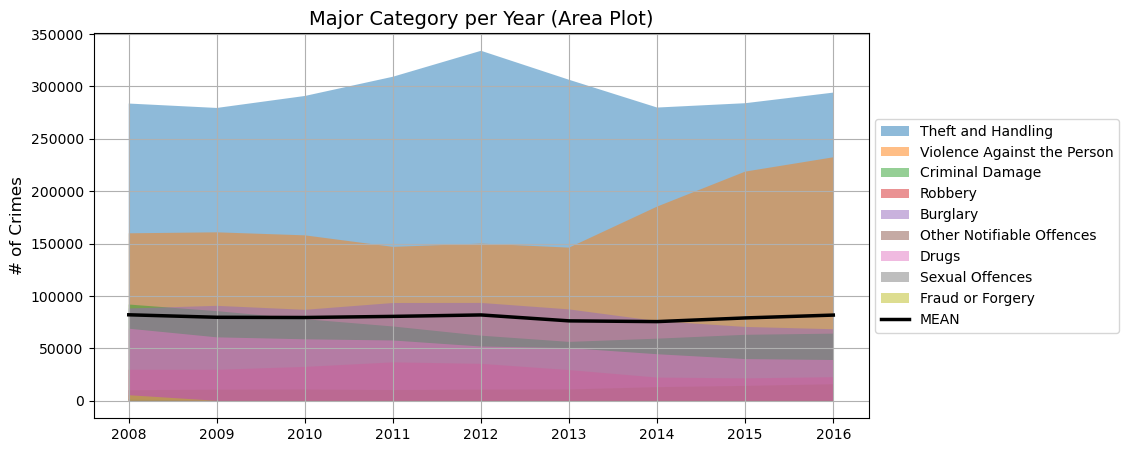

In [185]:
from collections import defaultdict

# Contoh data
m_cat_per_year = defaultdict(list)

for category in cropped_ds['major_category'].unique():
    for year in np.sort(cropped_ds['year'].unique()):
        c_year = cropped_ds.loc[(cropped_ds['year'] == year)]
        crimes = sum(c_year.loc[(c_year['major_category'] == category)]['value'])
        m_cat_per_year[category].append(crimes)

mcpy_mean = np.mean([m_cat_per_year[key] for key in m_cat_per_year.keys()], axis=0)
years = np.sort(cropped_ds['year'].unique())

plt.figure(figsize=(10, 5))

# Mengisi area di bawah garis untuk setiap kategori utama
for category in m_cat_per_year.keys():
    plt.fill_between(years, m_cat_per_year[category], alpha=0.5, label=category)

# Menggambar garis rata-rata
plt.plot(years, mcpy_mean, linewidth=2.5, label='MEAN', color='black')

plt.xticks(years, years)
plt.ylabel('# of Crimes')
plt.title('Major Category per Year (Area Plot)')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


Seperti yang kita lihat, sekali lagi, kategori kejahatan utama yang paling sering adalah Pencurian dan Handling, yang mempertahankan rasio yang cukup tinggi selama bertahun-tahun. Di tempat kedua sebagai kategori kejahatan utama ada Kekerasan terhadap Orang, yang menampilkan perilaku yang menarik, yaitu, dengan terus meningkat dari 2013 hingga 2016. Kategori kejahatan utama lainnya berfluktuasi antara 50.000 dan 100.000 jenayah per tahun. Kedua Pelanggaran Seksual dan Penipuan atau Palsu hampir tidak muncul di grafik, karena rasio kejahatan per tahun mereka, dibandingkan dengan kejahatannya kategori utama lainnya, sangat rendah.


### Membuat Wordcloud dengan data Minor Category

In [188]:
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed adm imported!')

Wordcloud is installed adm imported!


In [193]:
# menggunakan stopwords
stopwords = set(STOPWORDS)

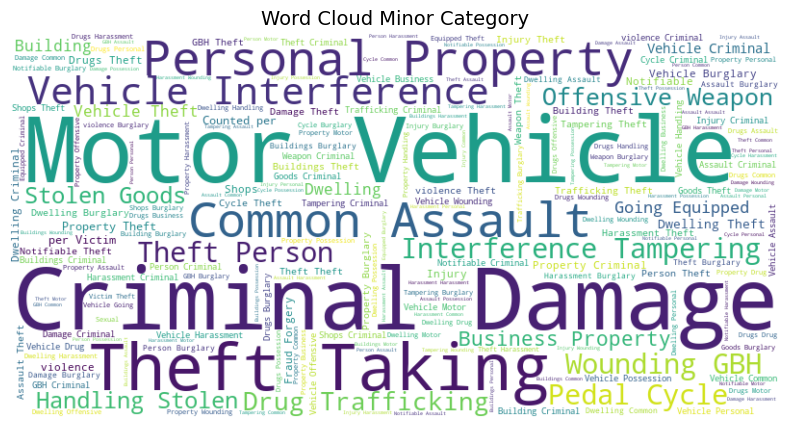

In [196]:
# Pastikan kolom yang berisi teks telah diidentifikasi, misalnya, 'text_column'
text_column = 'minor_category'

# Menggabungkan semua teks dari kolom 'text_column' ke dalam satu string
text = ' '.join(df_lon[text_column].astype(str))

# Membuat objek WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Menampilkan Word Cloud dengan matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Menghilangkan sumbu x dan y
plt.title('Word Cloud Minor Category')
plt.show()

### Studi Kasus: WESTMINSTER

In [199]:
westminster = cropped_ds.loc[df_lon['borough'] == 'Westminster']

print('RECORDS: {}'.format(westminster.shape[0]))

RECORDS: 110070


In [207]:
crimes_per_year = {}


for year in np.sort(westminster['year'].unique()):
    crimes_y = westminster.loc[df_lon['year'] == year]
    crimes_per_year[year] = sum(crimes_y['value'])
    crimes_per_month[year] = []

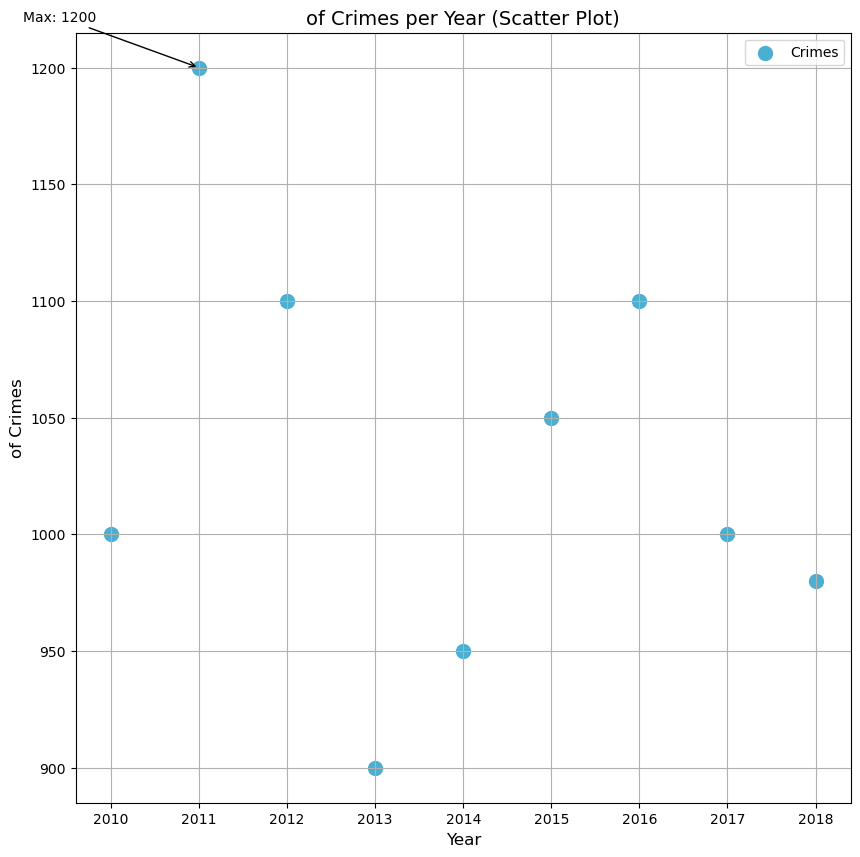

In [208]:
# Data yang disiapkan sebelumnya
crimes_per_year = {
    2010: 1000,
    2011: 1200,
    2012: 1100,
    2013: 900,
    2014: 950,
    2015: 1050,
    2016: 1100,
    2017: 1000,
    2018: 980
}

plt.figure(figsize=(10, 10))

# Membuat scatter plot
plt.scatter(crimes_per_year.keys(), crimes_per_year.values(), 
            c='#4bafd1', s=100, marker='o', label='Crimes')

# Menandai titik maksimum
max_crimes_year = max(crimes_per_year, key=crimes_per_year.get)
max_crimes_value = crimes_per_year[max_crimes_year]
plt.annotate(f'Max: {max_crimes_value}', xy=(max_crimes_year, max_crimes_value), 
             xytext=(max_crimes_year - 2, max_crimes_value + 20),
             arrowprops=dict(arrowstyle='->', color='black'))

plt.xlabel('Year')
plt.ylabel('of Crimes')
plt.title('of Crimes per Year (Scatter Plot)')
plt.grid(True)

plt.legend()
plt.show()


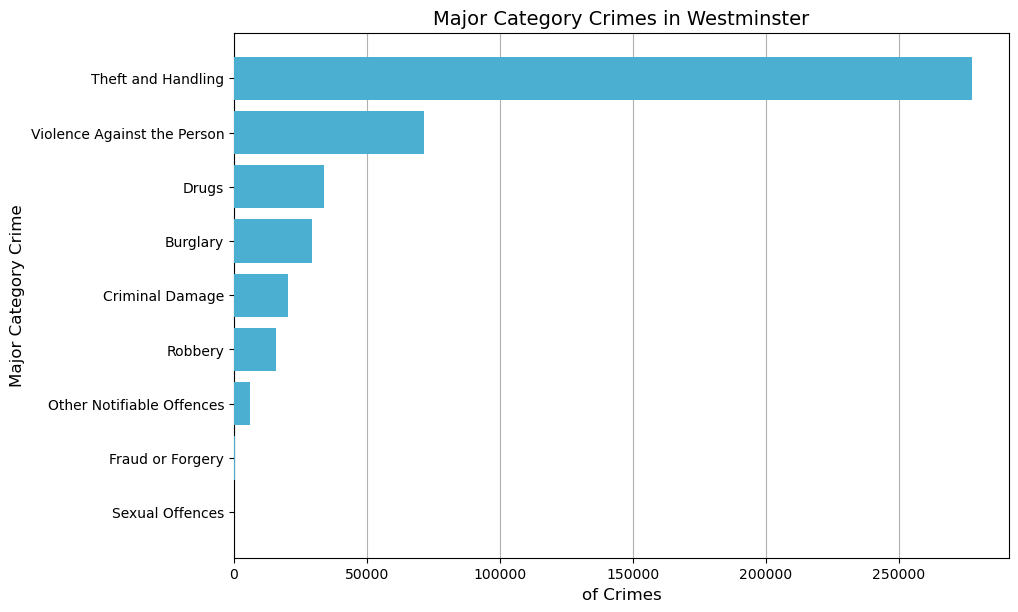

In [219]:
plt.figure(figsize=(10, 15))
plt.subplot(2, 1, 1)
plot_ordered_horizontal_barplot(westminster, 'major_category', 
                                'Major Category Crimes in Westminster',
                                'of Crimes', 'Major Category Crime')

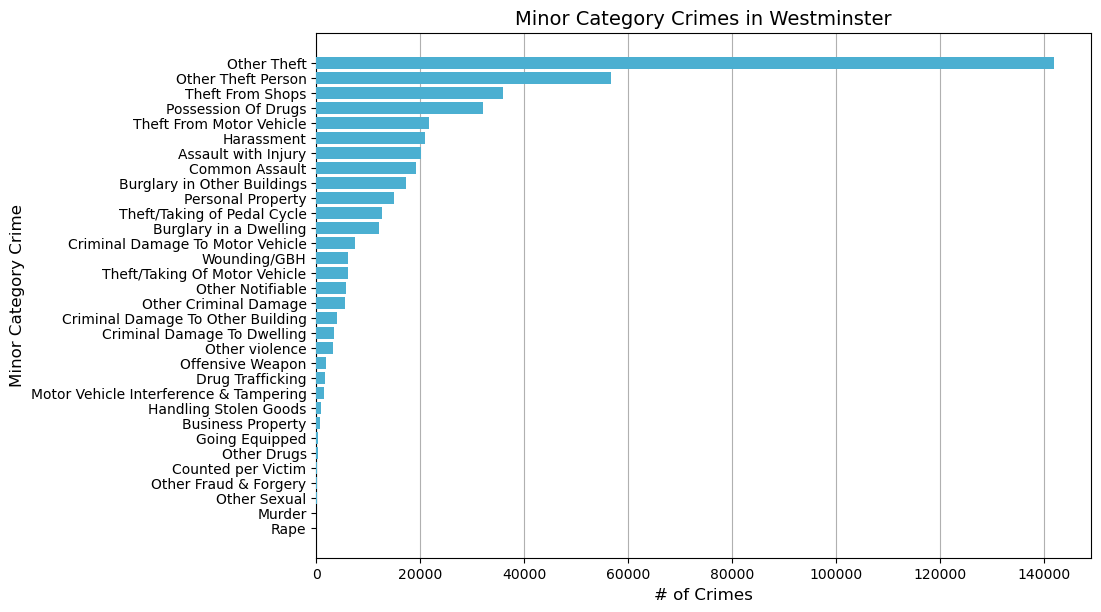

In [220]:
plt.figure(figsize=(10, 15))
plt.subplot(2, 1, 2)
plot_ordered_horizontal_barplot(westminster, 'minor_category', 
                                'Minor Category Crimes in Westminster',
                                '# of Crimes', 'Minor Category Crime')